# 1. Datenimport, -darstellung und -visualisierung

****
### <span style='background :yellow' > **Aufgabe 1** </span>
A) Importieren Sie grundlegende Funktionsbibliotheken sowie den Datensatz "energydata_complete.csv" in das Programm und wählen Sie den Zeitstempel als Index. <br>
B) Verschaffen Sie sich einen Überblick über den Datensatz und geben Sie grundlegende statistische Kennwerte an.<br>
C) Stellen Sie den Ausgabewert (km) des Datensatzes in Form eines Diagramms dar und achten Sie auf geeignete Achsenbezeichnungen.<br>
D) Beschreiben Sie Ihre Erkenntnisse aus den Teilaufgaben B und C.<br>
****

## 1.1 Import der Funktionsbibliotheken

In [44]:
import pandas as pd
import numpy as np
pd.set_option("display.max_columns", None)
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline
matplotlib.style.use('ggplot')

## 1.2 Import der CSV-Datei

In [45]:
file = "1R_HVAC Energy Data.csv"
# Auslesen der CSV-Datei + Erstellung Dataframe (df)
df = pd.read_csv(file,  sep=';',parse_dates=['date']) #decimal=',' Gleitkommazahlen ohne Punkt
# Kleinbuchstaben für Spaltennamen (optional)
df.columns = [x.lower() for x in df.columns]
# Setze Spalte 'date' als "Datetime-Index" für Dataframe
df = df.set_index('date')

## 1.3 Darstellung des importierten Datensatzes

In [46]:
print(df)

                         cwr   cwt      bl    cec    ta  taupunkt  hum   ws  \
date                                                                          
2019-08-18 00:00:00  1109.52  31.4  1678.6  116.2  27.8      23.9   79  5.8   
2019-08-18 00:30:00  1092.60  31.1  1611.1  114.5  27.8      23.9   79  5.4   
2019-08-18 01:00:00  1096.56  31.3  1618.4  116.8  27.8      23.9   79  5.4   
2019-08-18 01:30:00  1099.08  31.4  1604.8  117.0  27.8      23.9   79  5.4   
2019-08-18 02:00:00  1097.64  31.4  1593.9  117.0  27.8      23.9   79  5.4   
...                      ...   ...     ...    ...   ...       ...  ...  ...   
2020-06-01 11:00:00  1407.60  33.4  2029.7  132.8  28.9      23.9   74  2.2   
2020-06-01 11:30:00  1411.20  33.2  1985.6  128.6  28.9      23.9   74  2.7   
2020-06-01 12:00:00  1408.68  33.0  1966.0  125.7  27.8      23.9   79  2.7   
2020-06-01 12:30:00  1410.12  33.2  1981.0  127.3  27.8      25.0   84  1.3   
2020-06-01 13:00:00  1408.68  33.3  1994.0  129.0  2

## 1.4  Statistische Kennwerte des Datensatzes

In [47]:
df.describe()
#count= Anzahl der Werte
#mean= Durchschnitt der Werte
#std= Standardabweichung der Werte
#min= minimaler Wert
#25%= 25%-Quantil (25 % aller Werte liegen unterhalb dieses Wertes)
#50%= 50%-Quantil (50 % aller Werte liegen unterhalb dieses Wertes)
#75%= 75%-Quantil (75 % aller Werte liegen unterhalb dieses Wertes)
#max= maximaler Wert

,cwr,cwt,bl,cec,ta,taupunkt,hum,ws,ps
count,13615.000000,13615.000000,13615.000000,13615.000000,13615.000000,13615.000000,13615.000000,13615.000000,13615.000000
mean,1253.757682,31.622277,1823.316511,126.811605,28.388748,23.892016,77.846272,2.812457,29.809725
std,162.763053,1.253298,337.176128,30.160350,2.133984,1.044987,11.050784,1.686079,0.062882
min,938.160000,25.800000,192.900000,18.000000,22.800000,15.000000,34.000000,0.000000,29.600000
25%,1126.080000,30.800000,1552.300000,105.600000,27.200000,22.800000,70.000000,1.300000,29.800000
50%,1220.760000,31.500000,1734.600000,118.100000,27.800000,23.900000,79.000000,2.700000,29.800000
75%,1375.200000,32.500000,2082.500000,138.300000,30.000000,25.000000,84.000000,4.000000,29.800000
max,1833.840000,36.200000,3809.400000,281.200000,33.900000,27.200000,100.000000,9.400000,30.000000


## 1.5 Visualisierung des Ausgabewerts

Text(0, 0.5, 'Stromverbrauch Kältemaschinen [kWh]')

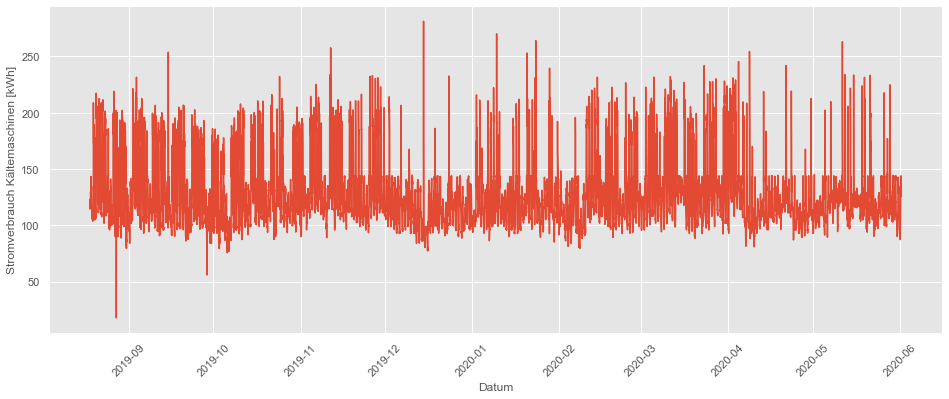

In [48]:
from pandas.plotting import register_matplotlib_converters
register_matplotlib_converters()
plt.figure(figsize=(16,6))
plt.plot(df.cec)
plt.xticks( rotation='45')# Rotationswinkel der Schritte für die X-Achse
plt.xlabel('Datum')# Überschrift der X-Achse
plt.ylabel('Stromverbrauch Kältemaschinen [kWh]')#Überschrift der Y-Achse

Die Visualisierung zeigt  geringer Stromverbrauchswerte in den Wintermonaten sowie einige starke Ausreißer.
Ebenso zeigt die Visualisierung das es einen immer Konstanten Verbrauch gibt. Jedoch muss auch betrachtet werden, wie exakt unser Datensatz ist, um Entschlüsse ziehen zu können warum dies so ist.
Uns interessieren die Verbrauchsmuster im Sommer und in der Übergangszeit weshalb wir im nächsten Schritt die Ausreißer, d.h. sehr niedrige sowie sehr hohe Werte, aus dem Datensatz entfernen. 

# 2. Datenvorverarbeitung

### <span style='background :yellow' > **Aufgabe 2** </span>
A) Sortieren Sie die Ausgabewert der Größe nach (absteigend) und visualisieren Sie die Ergebnisse in Form eines Boxplots. <br>
B) Entfernen Sie anschließend alle Werte aus dem Datensatz und legen Sie eine geeignetes Perzentil fest, unter und oberhalb dessen die Werte enfernt werden sollen.<br>
C) Visualisieren Sie im Anschluss den bereinigten Datensatz und vergleichen Sie das Ergebniss zur der Darstellung aus Aufgabe 1 C).<br>

## 2.1 Ausreißererkennung und -entfernung

### 2.1.1 Detektion von Ausreißern

In [49]:
# Sortiere Ausgabewert nach Größe (absteigend)
sorted_cec_up = df.sort_values('cec',ascending=False)
upper_treshold=sorted_cec_up.cec[len(sorted_cec_up.head(len(sorted_cec_up)//1000))]
# Sortiere Ausgabewert nach Größe (aufsteigend)
sorted_cec_down = df.sort_values('cec',ascending=True)
lower_treshold=sorted_cec_down.cec[len(sorted_cec_down.head(len(sorted_cec_down)//1000))]

C:\Users\oeyet\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


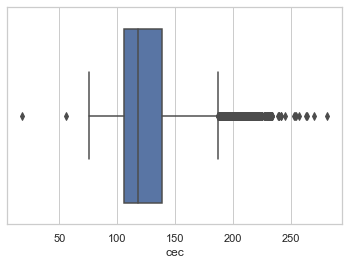

In [50]:
# Boxplot
sns.set(style="whitegrid")
ax = sns.boxplot(df.cec)

In [51]:
print("Das 99,9%-Perzentil des Ausgabewerts beträgt",
      upper_treshold,"kWh,",len(sorted_cec_up.head(len(sorted_cec_up)//1000)),"Werte liegen oberhalb diesen Wertes.")

Das 99,9%-Perzentil des Ausgabewerts beträgt 238.6 kWh, 13 Werte liegen oberhalb diesen Wertes.


In [52]:
print("Das 0,01%-Perzentil des Ausgabewerts beträgt",
      lower_treshold,"kWh,",len(sorted_cec_down.head(len(sorted_cec_down)//1000)),"Werte liegen unterhalb diesen Wertes.")

Das 0,01%-Perzentil des Ausgabewerts beträgt 79.4 kWh, 13 Werte liegen unterhalb diesen Wertes.


### 2.1.2 Entfernung der Ausreißer

In [53]:
# Entferne Werte aus dem Datensatz ober und unterhalb der festgelegten Grenze
df = df.dropna()
df = df.drop(df[(df.cec>upper_treshold)|(df.cec<lower_treshold)].index)

### 2.1.3 Visualisierung des bereinigten Ausgabewerts

Text(0, 0.5, 'Stromverbrauch Kältemaschinen [kWh]')

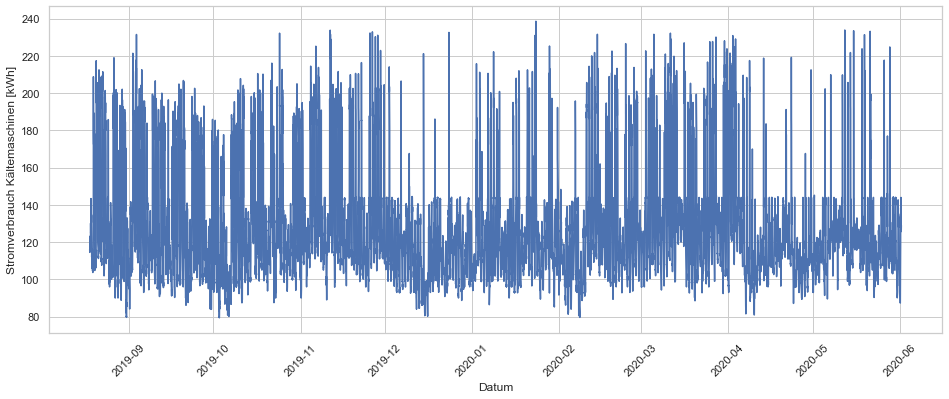

In [54]:
plt.figure(figsize=(16,6))
plt.plot(df.cec)
plt.xticks( rotation='45')
plt.xlabel('Datum')
plt.ylabel('Stromverbrauch Kältemaschinen [kWh]')

****
### <span style='background :yellow' > **Aufgabe 3** </span>
A) Extrahieren Sie die Merkmale Monat, Woche, Wochentag und Tagesstunde aus dem Zeitstempel und hängen Sie diese als zusätzliche Spalten an den Datensatz an.<br>
B) Berechnen Sie die durchschnittliche Werte des Ausgabewerts je<br>
* B.1) Wochentag
* B.2) Wochentag und Monat
* B.3) Tagesstunde
* B.4) Wochentag und Tagesstunde

C) Wählen Sie eine geeignete Darstellung zur Visualisierung der aggregierten Werte aus Aufgabe B).<br>
****

## 2.2 Merkmalsextraktion

In [55]:
# Hänge weitere Spalten an den Dataframe via Datetime-Index
df['month'] = df.index.month
df['weekday'] = df.index.weekday
df['hour'] = df.index.hour
df['week'] = df.index.week

<ipython-input-55-c9ca2656a7d6>:5: FutureWarning: weekofyear and week have been deprecated, please use DatetimeIndex.isocalendar().week instead, which returns a Series.  To exactly reproduce the behavior of week and weekofyear and return an Index, you may call pd.Int64Index(idx.isocalendar().week)
  df['week'] = df.index.week


In [56]:
print(df)

                         cwr   cwt      bl    cec    ta  taupunkt  hum   ws  \
date                                                                          
2019-08-18 00:00:00  1109.52  31.4  1678.6  116.2  27.8      23.9   79  5.8   
2019-08-18 00:30:00  1092.60  31.1  1611.1  114.5  27.8      23.9   79  5.4   
2019-08-18 01:00:00  1096.56  31.3  1618.4  116.8  27.8      23.9   79  5.4   
2019-08-18 01:30:00  1099.08  31.4  1604.8  117.0  27.8      23.9   79  5.4   
2019-08-18 02:00:00  1097.64  31.4  1593.9  117.0  27.8      23.9   79  5.4   
...                      ...   ...     ...    ...   ...       ...  ...  ...   
2020-06-01 11:00:00  1407.60  33.4  2029.7  132.8  28.9      23.9   74  2.2   
2020-06-01 11:30:00  1411.20  33.2  1985.6  128.6  28.9      23.9   74  2.7   
2020-06-01 12:00:00  1408.68  33.0  1966.0  125.7  27.8      23.9   79  2.7   
2020-06-01 12:30:00  1410.12  33.2  1981.0  127.3  27.8      25.0   84  1.3   
2020-06-01 13:00:00  1408.68  33.3  1994.0  129.0  2

## 2.3 Datenaggregation und -visualisierung

In [57]:
# Durchschnittswert je Tagesstunde
def hourly(x,df=df):
    return df.groupby('hour')[x].mean()

# Durchschnittswert je Wochentag
def daily(x,df=df):
    return df.groupby('weekday')[x].mean()
    
# Durchschnittswert je Wochentag und Monat
def monthly_daily(x,df=df):
    by_day = df.pivot_table(index='weekday', 
                                columns=['month'],
                                values=x,
                                aggfunc='mean')
    return round(by_day, ndigits=1)

# Durchschnittswert je Wochentag und Monat
def daily_hourly(x,df=df):
    by_day_hour = df.pivot_table(index='weekday', 
                                columns=['hour'],
                                values=x,
                                aggfunc='mean')
    return round(by_day_hour, ndigits=0)

# Durchschnittswert je Wochentag und Tagesstunde
def code_mean(data, cat_feature, real_feature):
    return dict(data.groupby(cat_feature)[real_feature].mean())

df['weekday_avg'] = list(map(code_mean(df[:], 'weekday', "cec").get, df.weekday))
df['hour_avg'] = list(map(code_mean(df[:], 'hour', "cec").get, df.hour))
#df.describe()

### 2.3.1 Mittelwert je Wochentag

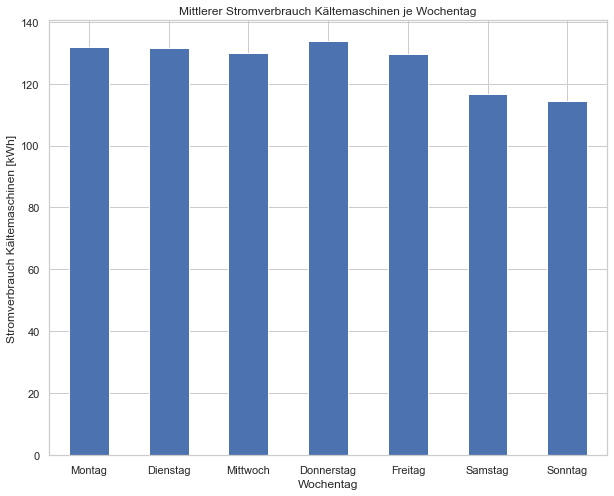

In [58]:
# Diagramm: Mittlerer Stromverbrauch Kältemaschinen je Wochentag
daily('cec').plot(kind = 'bar', figsize=(10,8))
ticks = list(range(0, 7, 1)) 
labels = "Montag Dienstag Mittwoch Donnerstag Freitag Samstag Sonntag".split()
plt.xlabel('Wochentag')
plt.ylabel('Stromverbrauch Kältemaschinen [kWh]')
plt.title('Mittlerer Stromverbrauch Kältemaschinen je Wochentag')
plt.xticks(ticks, labels,rotation='0');

### 2.3.2 Mittelwert je Wochentag und Monat (Heatmap)

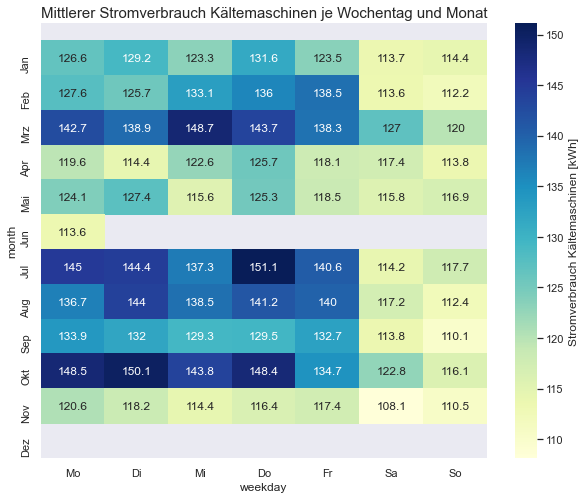

In [59]:
# Heatmap: Mittlerer Stromverbrauch Kältemaschinen je Wochentag und Monat
sns.set(rc={'figure.figsize':(10,8)},)
ax=sns.heatmap(monthly_daily('cec').T,cmap="YlGnBu",
               xticklabels="Mo Di Mi Do Fr Sa So".split(),
               yticklabels="Jan Feb Mrz Apr Mai Jun Jul Aug Sep Okt Nov Dez".split(),
               annot=True, fmt='g',
               cbar_kws={'label': 'Stromverbrauch Kältemaschinen [kWh]'}).set_title("Mittlerer Stromverbrauch Kältemaschinen je Wochentag und Monat").set_fontsize('15')
b, t = plt.ylim()
b += 0.5
t -= 0.5
plt.ylim(b, t)
plt.show()


### 2.3.3 Mittelwert je Wochentag und Tagesstunde

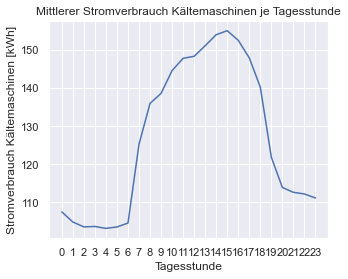

In [60]:
# Diagramm: Mittlerer Stromverbrauch Kältemaschinen je Tagesstunde
hourly('cec').plot(figsize=(5,4))
plt.xlabel('Tagesstunde')
plt.ylabel('Stromverbrauch Kältemaschinen [kWh]')
ticks = list(range(0, 24, 1))
plt.title('Mittlerer Stromverbrauch Kältemaschinen je Tagesstunde')

plt.xticks(ticks);

### 2.3.4 Mittelwert je Wochentag und Stunde (Heatmap)

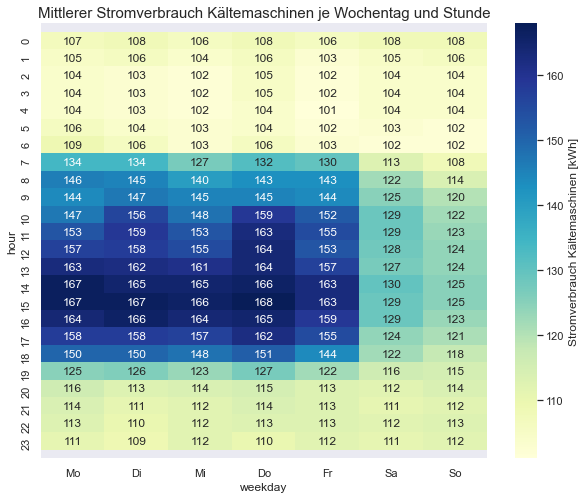

In [61]:
# Heatmap: Mittlerer Stromverbrauch Kältemaschinen je Wochentag und Stunde
sns.set(rc={'figure.figsize':(10,8)},)
ax=sns.heatmap(daily_hourly('cec').T,cmap="YlGnBu",
               xticklabels="Mo Di Mi Do Fr Sa So".split(),
               yticklabels=list(range(0, 24, 1)),
               annot=True, fmt='g',
               cbar_kws={'label': 'Stromverbrauch Kältemaschinen [kWh]'}).set_title("Mittlerer Stromverbrauch Kältemaschinen je Wochentag und Stunde").set_fontsize('15')
b, t = plt.ylim()
b += 0.5
t -= 0.5
plt.ylim(b, t)
plt.show()


****
### <span style='background :yellow' > **Aufgabe 4** </span>
A) Transfomieren Sie den Ausgabewert mithilfe der logarithmische Transformation. <br>
B) Erstellen Sie ein Histogramm zur Visualisierung der Häufigkeitsverteilung für den <br>
* B.1) Ausgabewert.
* B.2) log-transformierten Ausgabewert.

C) Vergleichen Sie die Ergebnisse im Hinblick auf die Verteilung der Daten.
****

## 2.4 Log-Transformation und Histogramm

In [62]:
# Logarithmische Transformation der Werte
# Die Log-Transformation ordnet jedem ursprünglichen Wert als transformierten Wert
# den entsprechenden natürlichen Logarithmus dieses Werts zu.
df['log_cec'] = np.log(df.cec)

C:\Users\oeyet\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\oeyet\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


Text(0.5, 0, 'cec_log [kWh]')

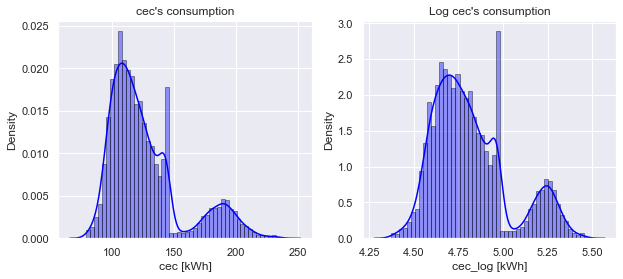

In [63]:
f, axes = plt.subplots(1, 2,figsize=(10,4))

# Histogramm Ausgabewert
sns.distplot(df.cec, hist=True, color = 'blue',hist_kws={'edgecolor':'black'},ax=axes[0])
axes[0].set_title("cec's consumption")
axes[0].set_xlabel('cec [kWh]')

# Histogramm des Log-transformierten Ausgabewerts
sns.distplot(df.log_cec, hist=True, color = 'blue',hist_kws={'edgecolor':'black'},ax=axes[1])
axes[1].set_title("Log cec's consumption")
axes[1].set_xlabel('cec_log [kWh]')

****
### <span style='background :yellow' > **Aufgabe 5** </span>
A) Erstellen Sie Streudiagramme für die Merkmale des Datensatzes und nutzen Sie dafür die Funktionalität "pairplot" aus der Funktionsbibliothek "seaborn". Betrachten Sie dabei die Streudiagramme des Ausgabewerts und den jeweiligen Merkmalen und nehmen sie eine visuelle Einschätzung hinsichtlich potenzieller linearer Abhängigkeiten vor.
Beschreiben Sie die Ergebnisse.<br>
B) Berechnen Sie die Korrelation zwischen allen Merkmalen des Datensatzes und visualisieren Sie die Ergebnisse mithilfe einer Heatmap. <br>Nutzen Sie dabei die "heatmap"-Funktionalität der Funktionsbibliothek "seaborn". <br>
c) Ermitteln Sie die drei Merkmale mit den höchsten Korrelation zum (log-transformierten) Ausgabewert und geben Sie die jeweiligen Korrelationskoeffizienten an.<br>
****

## 2.5 Visualisierung linearer Abhängigkeiten zwischen den Merkmalen

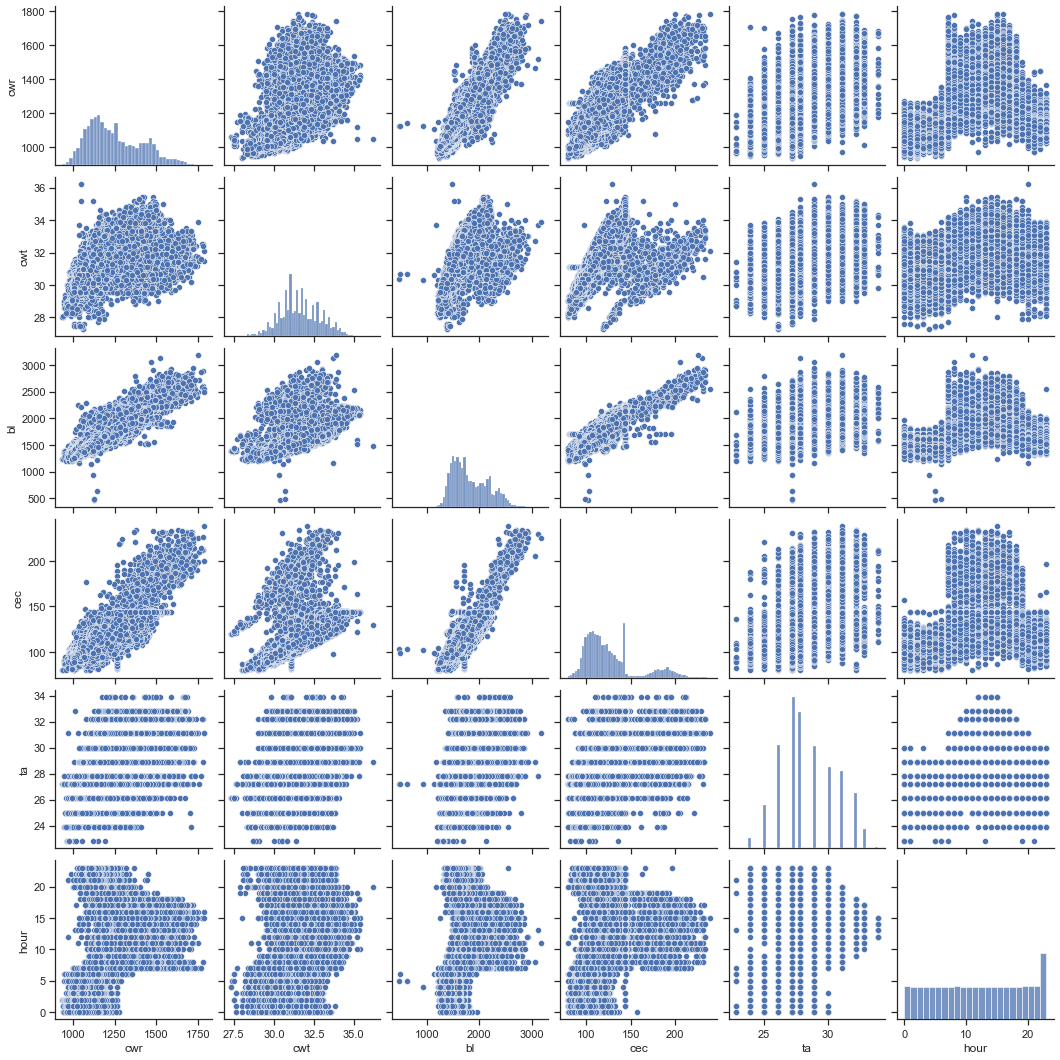

In [64]:
col = ['cwr', 'cwt', 'bl', 'cec', 'ta', 'hour',]
sns.set(style="ticks", color_codes=True)
sns.pairplot(df[col])
plt.show()

## 2.6 Korrelationsberechnung

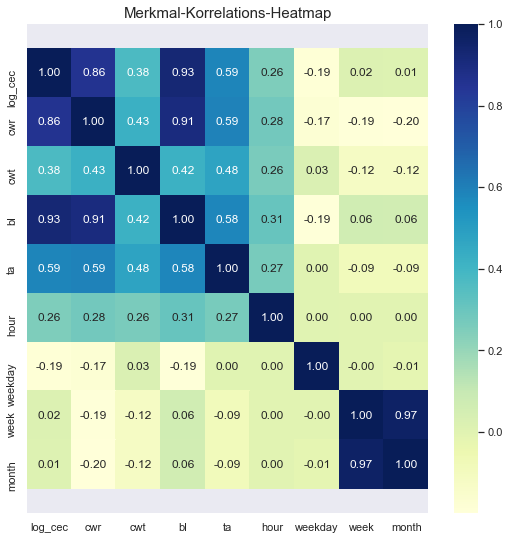

In [65]:
# Pearson-Korrelation zwischen den Merkmalen
col = ['log_cec', 'cwr', 'cwt', 'bl', 'ta', 'hour', 'weekday', 'week', 'month']
corr = df[col].corr()
plt.figure(figsize = (9,9))
sns.set(font_scale=1)
sns.heatmap(corr, cmap="YlGnBu",cbar = True, annot=True, square = False, fmt = '.2f', xticklabels=col, yticklabels=col,)
plt.title("Merkmal-Korrelations-Heatmap", fontsize = 15)
b, t = plt.ylim()
b += 0.5
t -= 0.5
plt.ylim(b, t)
plt.show();

****
### <span style='background :yellow' > **Aufgabe 6** </span>
A) Legen Sie 4 verschiedene Modelle an und weisen Sie ihnen die jeweils die gleichen Merkmale (exkl. Ausgabewert) zu.<br>
B) Wandeln Sie die Zahlenformate der Merkmale (inkl. Ausgabewert) in das Format "float" um.<br>
c) Teilen Sie die Modelle aus Aufgabe A jeweils in Test- und Trainingsdaten auf.<br>
d) Normalisieren Sie die Merkmale (exkl. Ausgabewert) mithilfe des StandardScaler-Funktion aus der Funktionsbibliothek "sklearn.preprocessing".<br>
e) Importieren Sie die Modelle
* linear_model
* svm
* RandomForestRegressor
* KNeighborsRegressor

aus der Funktionsbibliothek "sklearn" und wenden Sie diese auf die Trainingsdaten an. <br>
Verwenden Sie dabei die Standardeinstellungen hinsichtlicher der Modellparameter.
****

# 3. Prognose-Modelle

In [66]:
#for cat_feature in ['weekday', 'hour']:
    #df = pd.concat([df, pd.get_dummies(df[cat_feature])], axis=1)

## 3.1 Anlegen der Modelle und Zuordnung der Merkmale

In [67]:
# Lineares Regressions-Modell
model1 = ['hour','cwt','cwr','bl','ta']

# Support Vector Machines-Modell
model2 = ['hour','cwt','cwr','bl','ta']

# Random Forest-Modell
model3 = ['hour','cwt','cwr','bl','ta']

# k-Nearest Neighbours-Modell
model4 = ['hour','cwt','cwr','bl','ta']

## 3.2 Umwandlung der Zahlenformate

In [68]:
# Umandlung Zahlenformat

df.log_cec = df.log_cec.astype(float)
df.hour = df.hour.astype(float)
df.cwt = df.cwt.astype(float)
df.cwr = df.cwr.astype(float)
df.bl = df.bl.astype(float)
df.ta = df.ta.astype(float)

## 3.3 Aufteilung in Test- und Trainingsdaten

In [69]:
# Erstelle Test- und Trainingsmodell

#Festlegung der Testdatengröße. Hier beispielhaft 1/3 des gesamten Datensatzes für Testdaten, 
#2/3 des gesamten Datensatzes für Training

test_size=.3321 
test_index = int(len(df.dropna())*(1-test_size))

#Hier besteht die Möglichkeit mit den absoluten oder logarithmen des Ausgabewertes (y) zu arbeiten:

# Lineares Regressions-Modell
X1_train, X1_test = df[model1].iloc[:test_index,], df[model1].iloc[test_index:,]
#y1_train = df.log_km.iloc[:test_index,]
y1_train = df.cec.iloc[:test_index,]

# Support Vector Machines-Modell
X2_train, X2_test = df[model2].iloc[:test_index,], df[model2].iloc[test_index:,]
#y2_train = df.log_km.iloc[:test_index,]
y2_train = df.cec.iloc[:test_index,]

# Random Forest-Modell
X3_train, X3_test = df[model3].iloc[:test_index,], df[model3].iloc[test_index:,]
#y3_train = df.log_km.iloc[:test_index,]
y3_train = df.cec.iloc[:test_index,]

# k-Nearest Neighbours-Modell
X4_train, X4_test = df[model4].iloc[:test_index,], df[model4].iloc[test_index:,]
#y4_train = df.log_km.iloc[:test_index,]
y4_train = df.cec.iloc[:test_index,]

#y_test =  df.log_km.iloc[test_index:,]
y_test =  df.cec.iloc[test_index:,]

In [70]:
print(test_index)

9076


## 3.4 Normalisierung der Merkmale

In [71]:
from sklearn.preprocessing import StandardScaler

# Normalisierung der Merkmals-Trainingsdaten sodass Durchschnittswert = 0 und Standardabweichung = 1

scaler = StandardScaler()
scaler.fit(X1_train)
X1_train = scaler.transform(X1_train)
X1_test = scaler.transform(X1_test)

scaler.fit(X2_train)
X2_train = scaler.transform(X2_train)
X2_test = scaler.transform(X2_test)

scaler.fit(X3_train)
X3_train = scaler.transform(X3_train)
X3_test = scaler.transform(X3_test)

scaler.fit(X4_train)
X4_train = scaler.transform(X4_train)
X4_test = scaler.transform(X4_test)

## 3.5 Trainieren der Regressionsmodelle mit Standardeinstellungen

In [72]:
from sklearn import linear_model

lin_model = linear_model.LinearRegression()
lin_model.fit(X1_train,y1_train)

LinearRegression()

In [73]:
from sklearn import svm

svr_model = svm.SVR(gamma='scale')
svr_model.fit(X2_train,y2_train)

SVR()

In [74]:
from sklearn.ensemble import RandomForestRegressor

rf_model = RandomForestRegressor(n_estimators=100,random_state=1)            
rf_model.fit(X3_train, y3_train)

RandomForestRegressor(random_state=1)

In [75]:
from sklearn.neighbors import KNeighborsRegressor

#weights='uniform', p=1, algorithm='auto', leaf_size=30
kNN_model = KNeighborsRegressor(n_neighbors=100)            
kNN_model.fit(X4_train, y4_train)

KNeighborsRegressor(n_neighbors=100)

****
### <span style='background :yellow' > **Aufgabe 7** </span>
A) Verwenden Sie verschiedene Evaluationsmetriken um die Prognosegüte der einzelnen Modell miteinander zu vergleichen.
<br>
* MAE
* MAPE
* R^2

B) Führen Sie eine 10-fache Kreuzvalidierung für die einzelnen Modelle durch um die mittleren Evaluationsmetriken zu bestimmen. Nutzen Sie dabei die Funktion "TimeSeriesSplit". <br>

C) Bestimmen Sie anschließend das Prognosemodell mit der höchsten mittleren Prognosegüte bezüglich des R^2-Wertes.  <br>

D) Erstellen Sie ein Streudiagramm für jedes Modell, in welchem Sie prognostizierte Werte  <br>
* D.1) und Residuen gegenüberstellen.
* D.2) und tatsächliche Ausgabewerte gegenüberstellen.

Welche Erkenntnisse lassen sich aus den Visualisierungen ableiten?

****

# 4. Modellevaluation

In [76]:
from sklearn.model_selection import TimeSeriesSplit
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.model_selection import cross_val_score, cross_val_predict
from sklearn import metrics
from math import sqrt

## 4.1 Modellevaluation - Rechnerisch

### 4.1.1 Berechnung der Evaluationsmetriken

In [77]:
# Bewertung der Prognosegüte mittels MAE, MAPE, R^2, Modellgenauigkeit

def evaluate(model, test_features, test_labels):
    predictions = model.predict(test_features)
    errors = abs(predictions - test_labels)
    mape = 100 * np.mean(errors / test_labels)
    r_score = 100*r2_score(test_labels,predictions)
    accuracy = 100 - mape
    rmse = sqrt(mean_squared_error(test_labels, predictions))
    print(model,'\n')
    print('MAE                  : {:0.2f} degrees'.format(np.mean(errors)))
    print('MAPE                 : {:0.2f}%'.format(mape))
    print('RMSE                 : {:0.2f} degrees'.format(rmse))
    print('Bestimmtheitsmaß R^2 : {:0.2f}%' .format(r_score))
    print('Modellgenauigkeit    : {:0.2f}%\n'.format(accuracy))

In [78]:
evaluate(lin_model, X1_test, y_test)
evaluate(svr_model, X2_test, y_test)
evaluate(rf_model, X3_test, y_test)
evaluate(kNN_model, X4_test, y_test)

LinearRegression() 

MAE                  : 11.88 degrees
MAPE                 : 9.63%
RMSE                 : 14.35 degrees
Bestimmtheitsmaß R^2 : 73.51%
Modellgenauigkeit    : 90.37%

SVR() 

MAE                  : 4.63 degrees
MAPE                 : 3.59%
RMSE                 : 7.09 degrees
Bestimmtheitsmaß R^2 : 93.53%
Modellgenauigkeit    : 96.41%

RandomForestRegressor(random_state=1) 

MAE                  : 4.31 degrees
MAPE                 : 3.46%
RMSE                 : 6.59 degrees
Bestimmtheitsmaß R^2 : 94.42%
Modellgenauigkeit    : 96.54%

KNeighborsRegressor(n_neighbors=100) 

MAE                  : 4.89 degrees
MAPE                 : 3.96%
RMSE                 : 7.05 degrees
Bestimmtheitsmaß R^2 : 93.61%
Modellgenauigkeit    : 96.04%



### 4.1.2 Kreuzvalidierung

In [79]:
#10-fache Kreuzvalidierung mit TimeSeriesSplit (Variation von K-fold Kreuzvalidierung)
cv = TimeSeriesSplit(n_splits = 10)


print('Lineares Regressions-Modell:')
scores = cross_val_score(lin_model, X1_train, y1_train, cv=cv,scoring='neg_mean_absolute_error')
print("Modellgenauigkeit   : %0.2f (+/- %0.2f) degrees" % (100+scores.mean(), scores.std() * 2))
scores = cross_val_score(lin_model, X1_train, y1_train, cv=cv,scoring='r2')
print("Bestimmtheitsmaß R^2: %0.2f (+/- %0.2f) degrees" % (scores.mean(), scores.std() * 2))


 
print('Support Vector Machines-Modell:')
scores = cross_val_score(svr_model, X2_train, y2_train, cv=cv,scoring='neg_mean_absolute_error')
print("Modellgenauigkeit   : %0.2f (+/- %0.2f) degrees" % (100+scores.mean(), scores.std() * 2))
scores = cross_val_score(svr_model, X2_train, y2_train, cv=cv)
print("Bestimmtheitsmaß R^2: %0.2f (+/- %0.2f) degrees" % (scores.mean(), scores.std() * 2))


print('Random Forest-Modell:')
scores = cross_val_score(rf_model, X3_train, y3_train, cv=cv,scoring='neg_mean_absolute_error')
print("Modellgenauigkeit   : %0.2f (+/- %0.2f) degrees" % (100+scores.mean(), scores.std() * 2))
scores = cross_val_score(rf_model, X3_train, y3_train, cv=cv)
print("Bestimmtheitsmaß R^2: %0.2f (+/- %0.2f) degrees" % (scores.mean(), scores.std() * 2))


print('k-Nearest Neighbour-Modell:')
scores = cross_val_score(kNN_model, X4_train, y4_train, cv=cv,scoring='neg_mean_absolute_error')
print("Modellgenauigkeit   : %0.2f (+/- %0.2f) degrees" % (100+scores.mean(), scores.std() * 2))
scores = cross_val_score(kNN_model, X4_train, y4_train, cv=cv)
print("Bestimmtheitsmaß R^2: %0.2f (+/- %0.2f) degrees" % (scores.mean(), scores.std() * 2))

Lineares Regressions-Modell:
Modellgenauigkeit   : 91.04 (+/- 2.81) degrees
Bestimmtheitsmaß R^2: 0.81 (+/- 0.22) degrees
Support Vector Machines-Modell:
Modellgenauigkeit   : 93.76 (+/- 3.23) degrees
Bestimmtheitsmaß R^2: 0.87 (+/- 0.23) degrees
Random Forest-Modell:
Modellgenauigkeit   : 95.10 (+/- 3.14) degrees
Bestimmtheitsmaß R^2: 0.91 (+/- 0.20) degrees
k-Nearest Neighbour-Modell:
Modellgenauigkeit   : 94.01 (+/- 3.11) degrees
Bestimmtheitsmaß R^2: 0.90 (+/- 0.16) degrees


## 4.2 Modellevaluation - Visuell

### 4.2.1 Gegenüberstellung prognostizierte Ausgabewerte und Residuen

In [80]:
# Residuum = Abweichung zwischen prognostiziertem und tatsächlichem Ausgabewert

In [81]:
y1_pred = lin_model.predict(X1_test)
y2_pred = svr_model.predict(X2_test)
y3_pred = rf_model.predict(X3_test)
y4_pred = kNN_model.predict(X4_test)

Text(0.5, 0.01, 'Prognostizierte Ausgabewerte')

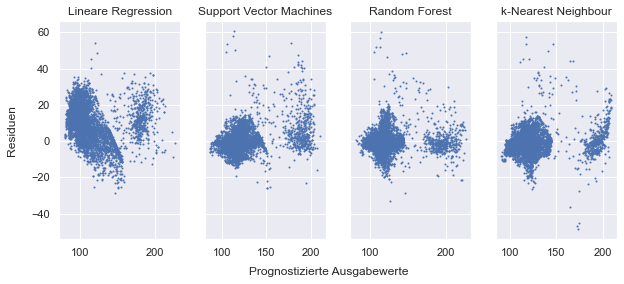

In [82]:
fig, axs = plt.subplots(1, 4, figsize=(10,4), sharey=True)
axs[0].scatter(y1_pred,y_test-y1_pred,s=1)
axs[0].set_title('Lineare Regression')
axs[1].scatter(y2_pred,y_test-y2_pred,s=1)
axs[1].set_title('Support Vector Machines')
axs[2].scatter(y3_pred,y_test-y3_pred,s=1)
axs[2].set_title('Random Forest')
axs[3].scatter(y4_pred,y_test-y4_pred,s=1)
axs[3].set_title('k-Nearest Neighbour')
fig.text(0.06, 0.5, 'Residuen', ha='center', va='center', rotation='vertical')
fig.text(0.5, 0.01,'Prognostizierte Ausgabewerte', ha='center', va='center')

### 4.2.2 Gegenüberstellung prognostizierte und tatsächliche Ausgabewerte - Streudiagramm

Text(0.5, 0.01, 'Tatsächliche Ausgabewerte')

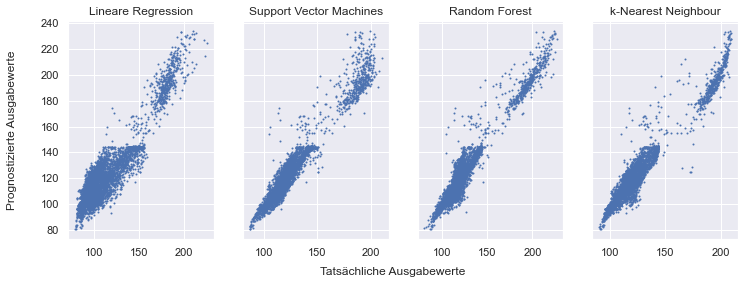

In [83]:
fig, axs = plt.subplots(1, 4, figsize=(12,4), sharey=True)
axs[0].scatter(y1_pred,y_test,s=1)
axs[0].set_title('Lineare Regression')
axs[1].scatter(y2_pred,y_test,s=1)
axs[1].set_title('Support Vector Machines')
axs[2].scatter(y3_pred,y_test,s=1)
axs[2].set_title('Random Forest')
axs[3].scatter(y4_pred,y_test,s=1)
axs[3].set_title('k-Nearest Neighbour')
fig.text(0.06, 0.5, 'Prognostizierte Ausgabewerte', ha='center', va='center', rotation='vertical')
fig.text(0.5, 0.01,'Tatsächliche Ausgabewerte', ha='center', va='center')

### 4.2.3 Gegenüberstellung prognostizierte und tatsächliche Ausgabewerte - Jahresverlauf

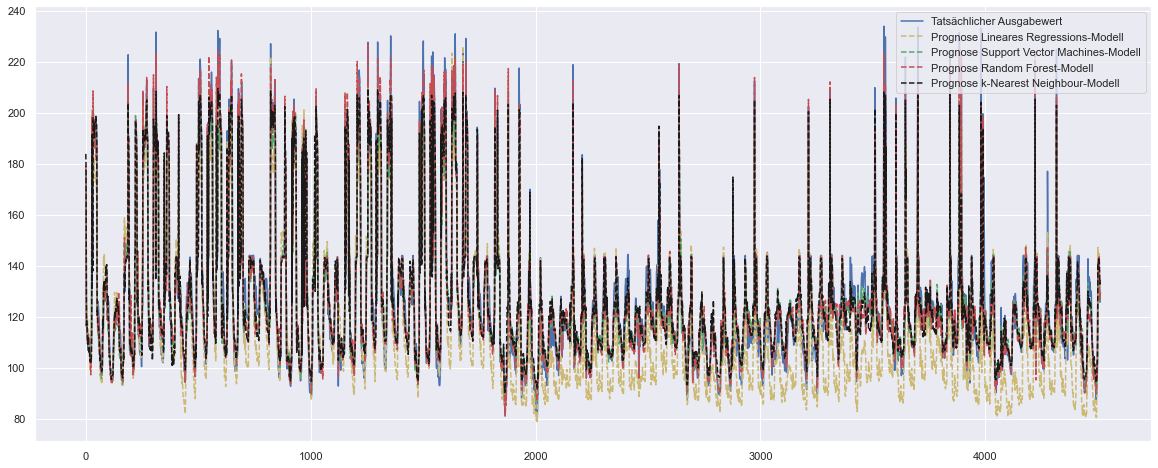

In [84]:
fig = plt.figure(figsize=(20,8))
plt.plot(y_test.values,label='Tatsächlicher Ausgabewert',color='b')
plt.plot(y1_pred,label='Prognose Lineares Regressions-Modell', linestyle='--', color='y')
plt.plot(y2_pred,label='Prognose Support Vector Machines-Modell', linestyle='--', color='g')
plt.plot(y3_pred,label='Prognose Random Forest-Modell', linestyle='--', color='r')
plt.plot(y4_pred,label='Prognose k-Nearest Neighbour-Modell', linestyle='--', color='k')



plt.legend(loc=1)